# Import and Setup

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
import importlib

plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

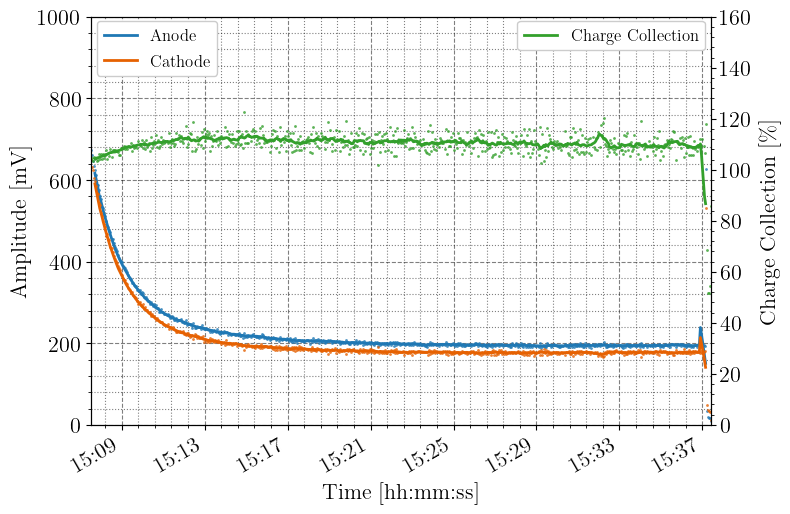

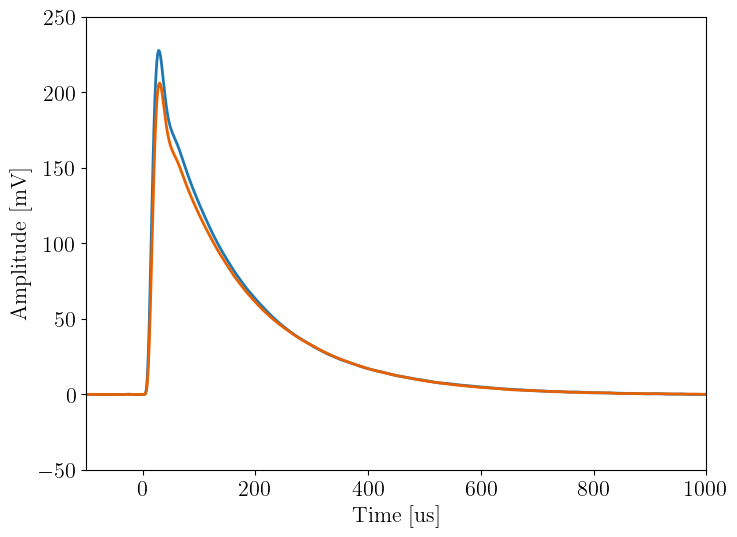

In [12]:
D1 = Dataset.Dataset(Path='C:/Data/20210604/', Selection='Vacuum*')
D1.RunStandardAnalysis()
D1.ShowAmplitudeVsTime(YTicks=200, YMax=1000)

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[0].Amp,axis=0))
plt.plot(D1.Ch[0].Time, np.mean(D1.Ch[1].Amp,axis=0))
plt.xlim(-100,1000)
plt.show()

Charge Collection [%]: 101.98 +- 1.22
Drift time [us]: 40.32
Electron lifetime [us]: -5335.94  - -1282.92


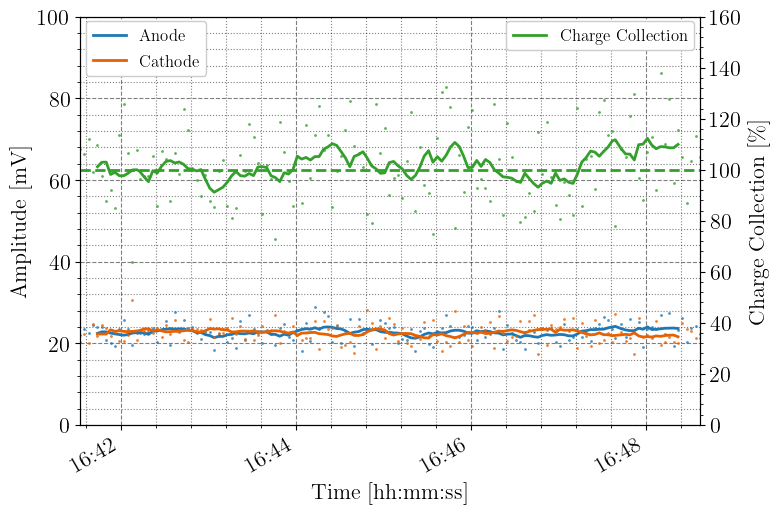

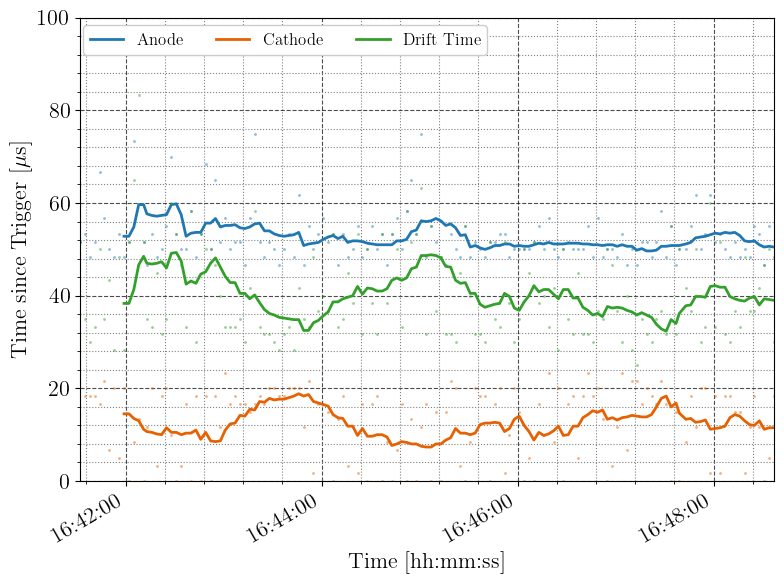

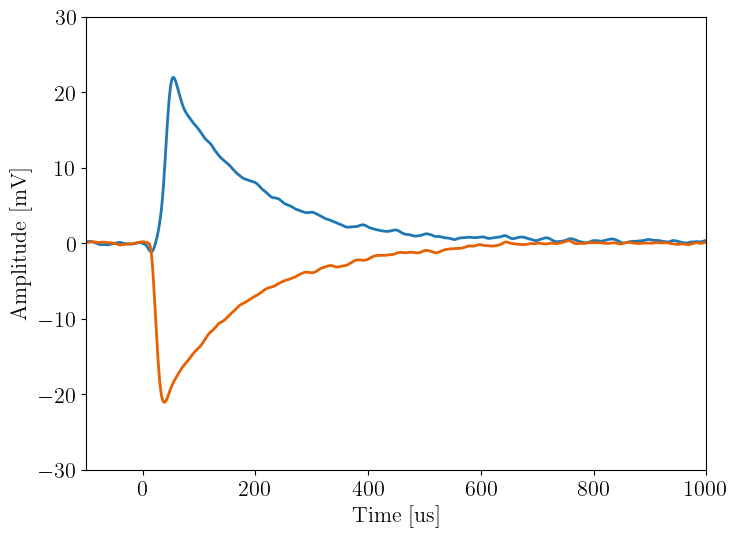

In [31]:
D2 = Dataset.Dataset(Path='C:/Data/20210604/', Selection='XeGas_1m*C-2*')
D2.RunStandardAnalysis()
D2.ShowAmplitudeVsTime(YTicks=20, YMax=100)
plt.hlines(y=100,xmin=np.min(D2.Ch[0].TimeStamp), xmax=np.max(D2.Ch[0].TimeStamp), color=colors[2], ls='--' )
# plt.hlines(y=np.mean(D2.ChargeCollection)*100,xmin=np.min(D2.Ch[0].TimeStamp), xmax=np.max(D2.Ch[0].TimeStamp), color=colors[2], ls='--' )
# plt.hlines(y=np.median(D2.ChargeCollection)*100,xmin=np.min(D2.Ch[0].TimeStamp), xmax=np.max(D2.Ch[0].TimeStamp), color=colors[2], ls=':' )
plt.savefig('20210604_cc.png')

D2.ShowDrifttimeVsTime()

cc = np.mean(D2.ChargeCollection)
cc_err = np.std(D2.ChargeCollection)/np.sqrt(len(D2.ChargeCollection))
dtime = np.mean(D2.DriftTime)
lifetime = -dtime/np.log(cc)
lifetime_hi =  -dtime/np.log(cc+cc_err)
lifetime_lo =  -dtime/np.log(cc-cc_err)
print("Charge Collection [%]: {:.2f} +- {:.2f}".format(cc*100, cc_err*100))
print("Drift time [us]: {:.2f}".format(dtime))
print("Electron lifetime [us]: {:.2f}  - {:.2f}".format(lifetime_lo, lifetime_hi))

plt.figure()
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [mV]')
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[0].Amp,axis=0))
plt.plot(D2.Ch[0].Time, np.mean(D2.Ch[1].Amp,axis=0)*-1)
plt.xlim(-100,1000)
plt.savefig('20210604_wfm.png')
plt.show()


[15.10766854  0.99050765  0.15735427]


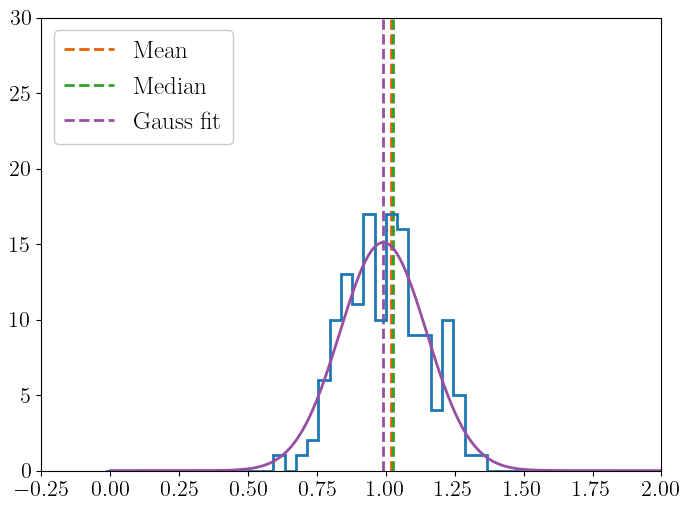

In [32]:
from scipy.optimize import curve_fit

def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

plt.figure()
hist = plt.hist(D2.ChargeCollection, bins=np.linspace(0,2,50), histtype='step', lw=2, align='left')
plt.vlines(x=np.mean(D2.ChargeCollection), ymin=0, ymax=30, color=colors[1], ls='--', label='Mean')
plt.vlines(x=np.median(D2.ChargeCollection), ymin=0, ymax=30, color=colors[2], ls='--', label='Median')

popt,pcov = curve_fit(gauss, hist[1][:-1], hist[0])
xfit = np.linspace(0,2,1000)
plt.plot(xfit, gauss(xfit, *popt), color=colors[3])

plt.vlines(x=popt[1], ymin=0, ymax=30, color=colors[3], ls='--', label='Gauss fit')
print(popt)

plt.legend(loc='upper left', fontsize=18)
plt.savefig('20210604_hist.png')
plt.show()


